# **Fraud Detection Model:**

For this project, I developed a machine learning model to detect fraudulent financial transactions. The model uses various features from transaction data, such as the transaction type, amount, and changes in the account balance, to predict whether a transaction is fraudulent or not.

**Steps:**

**Data Preparation**: I cleaned the data, handled missing values, and converted categorical data into numbers.

**Model Choice**: I used Logistic Regression, a simple model that works well for this type of task.

**Training**: The model learned from past transaction data to identify patterns that signal fraud.

**Predictio**n: The model predicted whether new transactions were fraud or not based on the features.

**Evaluation**: I checked the model's performance using accuracy and other metrics like precision and recall.

# *STEP 1 *

## **Importing required Libraries** 


In [132]:
import pandas as pd
import matplotlib.pyplot as plt


## **Loading the data**

In [133]:

df = pd.read_csv(r"C:\Users\Dikshant\Downloads\Fraud.csv")


In [134]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [135]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


## **Finding missing values**

In [136]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


### **No. of Fraud cases**

In [137]:
print("\nFraud cases:", df['isFraud'].value_counts())


Fraud cases: isFraud
0    6354407
1       8213
Name: count, dtype: int64


### **Handle missing values**

In [138]:
print("Missing values before:")
print(df.isnull().sum())

Missing values before:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [139]:
print("\nFraud Percentage:")
print(df['isFraud'].value_counts(normalize=True) * 100)


Fraud Percentage:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [140]:
print(df.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [141]:
print(df['isFraud'].value_counts(normalize=True) * 100)
print("\nFraud by Transaction Type:")
print(df.groupby('type')['isFraud'].sum())



# Total transactions by type
print("\nTotal Transactions per Type:")
print(df['type'].value_counts())

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

Fraud by Transaction Type:
type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

Total Transactions per Type:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


### ***Printing the column names to check their exact names***

In [142]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


### Model Choice: Logistic Regression

I chose Logistic Regression as our baseline model because:
- It is interpretable and explains the influence of each variable.
- It performs well with large datasets.
- It works well when classes are imbalanced (with proper handling).
- Coefficients provide insights into important fraud predictors.


**CHECKING OUTLIERS**


In [161]:
import numpy as np
from scipy.stats import zscore


z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))


outliers = (z_scores > 3).any(axis=1)
print(f"Outliers present in {outliers.sum()} rows.")


Outliers present in 410259 rows.


**FEATURES**

**QUESTION**-  How did you select variables to be included in the model? 


I selected the variables that had a clear link to the transaction behavior, like type of transaction, amount, balance before and after the transaction. I removed columns like names (nameOrig, nameDest) because they don’t help in predicting fraud. I also used dummy variables for transaction types to make them usable by the model. Overall, I kept only those features that could logically influence whether a transaction is fraud or not.

### Feature Selection

I dropped the following
- `nameOrig` and `nameDest
- `type`


In [143]:
#Balance change after  transaction

df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [144]:
df['dest_balance_ratio'] = df['newbalanceDest'] / (df['oldbalanceDest'] + 0.01)  

In [145]:
df['amount_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 0.01) 

In [146]:
print(df[['balance_change', 'dest_balance_ratio', 'amount_ratio']].head())


   balance_change  dest_balance_ratio  amount_ratio
0         9839.64                 0.0      0.057834
1         1864.28                 0.0      0.087735
2          181.00                 0.0      0.999945
3          181.00                 0.0      0.999945
4        11668.14                 0.0      0.280795


**TRAINING AND TESTING**

In [147]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)



In [149]:
print(df.columns)
# Dropping the 'type' column
df.drop('type', axis=1, inplace=True, errors='ignore')


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balance_change', 'dest_balance_ratio',
       'amount_ratio'],
      dtype='object')


In [150]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']



****CHECKING DATA TYPES****

In [151]:
print(X.dtypes)  


step                    int64
amount                float64
nameOrig               object
oldbalanceOrg         float64
newbalanceOrig        float64
nameDest               object
oldbalanceDest        float64
newbalanceDest        float64
isFlaggedFraud          int64
balance_change        float64
dest_balance_ratio    float64
amount_ratio          float64
dtype: object


In [152]:
cols_to_drop = ['nameOrig', 'nameDest']
existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols, inplace=True)


In [153]:
# Ensure 'type' exists and has expected values
if 'type' in df.columns:
    dummies = pd.get_dummies(df['type'], prefix='type')
    df = pd.concat([df, dummies], axis=1)

# Checking if dummies were added correctly
print(df.columns)


Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_change',
       'dest_balance_ratio', 'amount_ratio'],
      dtype='object')


In [154]:

print(df.dtypes)


step                    int64
amount                float64
oldbalanceOrg         float64
newbalanceOrig        float64
oldbalanceDest        float64
newbalanceDest        float64
isFraud                 int64
isFlaggedFraud          int64
balance_change        float64
dest_balance_ratio    float64
amount_ratio          float64
dtype: object


In [155]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [156]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5090096, 10) (1272524, 10) (5090096,) (1272524,)


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



model = LogisticRegression(max_iter=1000)

# Training the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9982837258865058

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.36      0.43      0.39      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.71      0.70   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:
[[1269634    1247]
 [    937     706]]


### ROC Curve and AUC Score

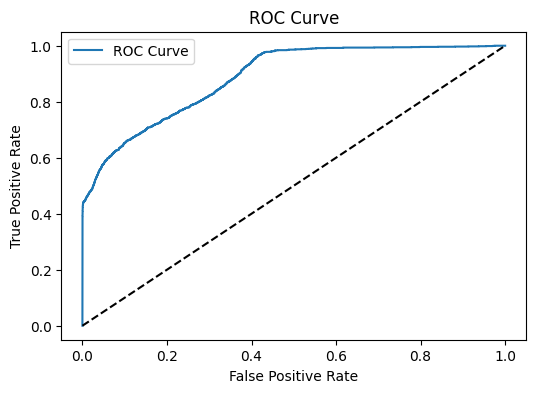

AUC Score: 0.8865517970991607


In [163]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_proba))


### Precison  call curve

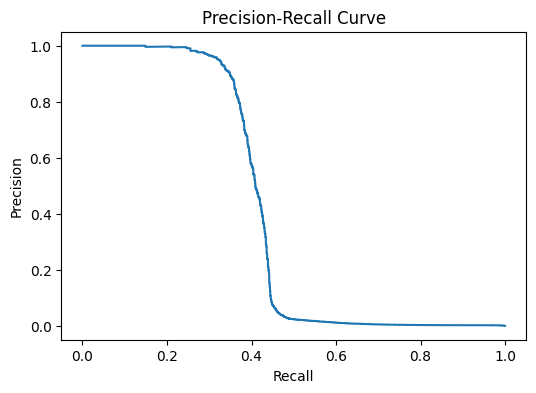

In [164]:

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


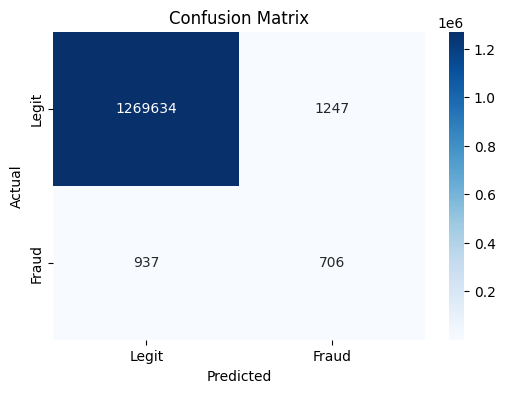

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


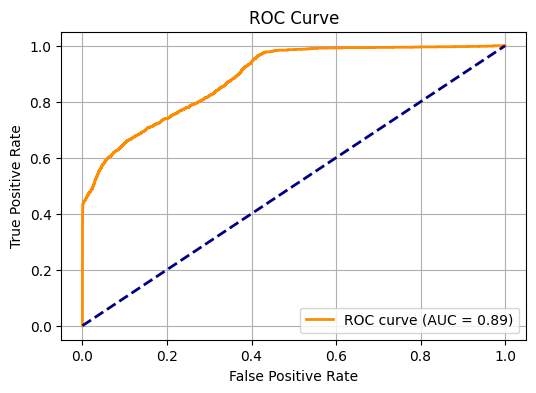

In [166]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### QUESTION- 
1. What are the key factors that predict fraudulent customer?
   - The main factors are - Transaction type, Amount of the transaction(very high amounts are more suspicious) and balance before and after the transaction.

2. Do these factors make sense? If yes, how?
   
Yes, they do. Most of the frauds happen during high-value transactions like transfers or cash-outs. Also, sudden changes in account balance can show something wrong. These patterns match with how fraud usually happens in real life.



3. What kind of prevention should be adopted while the company updates its infrastructure?
   
The company can add real time fraud detection tools and set alers for high risk and amoubnt transactions. They should use strong customer ID checks (like OTP or face recognition).


4. Assuming these actions have been implemented, how would you determine if they work?
   
We can compare the number of frauds before and after changes and check if the model is catching more frauds accurately.
-Track feedback from customers and support teams.
-Monitor if financial losses due to fraud go down.

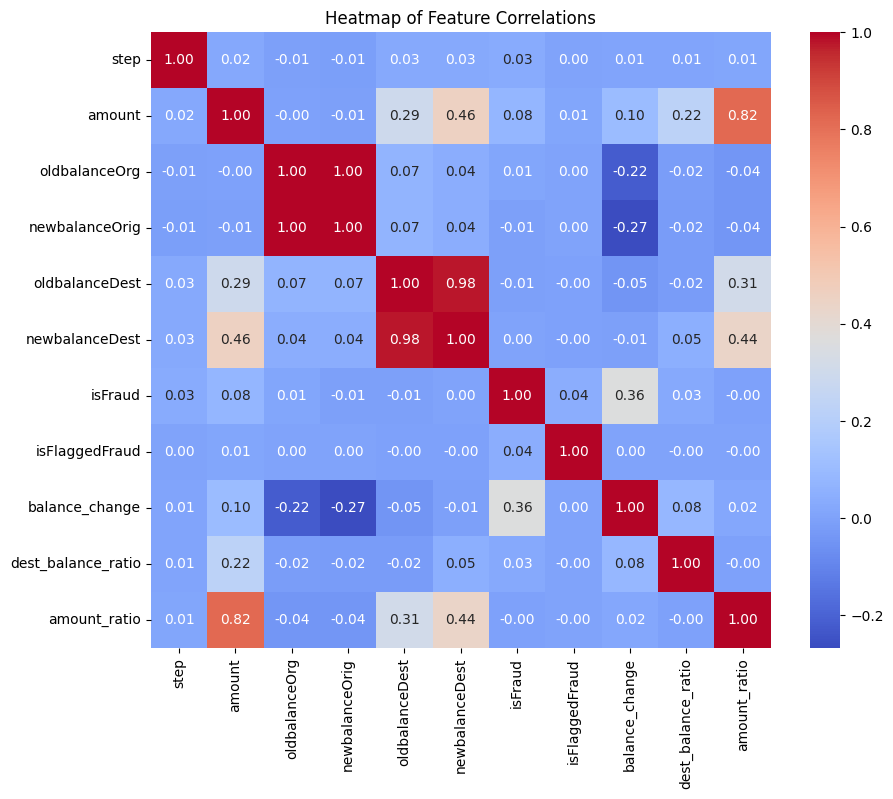

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title("Heatmap of Feature Correlations")
plt.show()
